# Does GDP affect Life Expectancy?

The purpose of this project is to analyze the effect GDP has on life expectancy. To do so, this project will utilize various Python functions, as well as certain Python libraries (Pandas, NumPy and SciPy), to load and manipulate a dataset - consisting of GDP and life expectancy data for six countries (Zimbabwe, United States, Mexico, Chile, China, and Germany) over the course of 15 years - into a more manageable format, and then calculate numerous statistics regarding that data. The data will then be organized into various charts and graphs using Python libraries such as Matplotlib and Seaborn. Finally, these various statistics and data visualizations will be used to answer the following questions:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- If one country has a higher GDP than another country, is that country also likely to have a longer life expectancy?
- What is the average life expectancy in these nations?
- What is the average GDP of these six countries?
- What is the distribution of that life expectancy?
- What is the distribution of GDP among the six countries?

## Load and Preview Data

In [134]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [135]:
data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Data Cleaning

Upon loading and previewing the data, data cleaning and tidying practices are employed by shortening (and otherwise modifying) the names of certain columns while keeping them descriptive. This makes these columns easier to access (e.g. enables the use of dot-notation by replacing all the spaces with underscores, eliminates the need for worrying about capitalization in column names by converting them to lowercase, etc.) without sacrificing readability. 

In [136]:
data.rename(columns={'Life expectancy at birth (years)': 'life_expectancy'}, inplace=True)

for col in data.columns:
    data.rename(columns={col: col.lower()}, inplace=True)

print(data.head())

  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Data Exploration
After the data has been loaded in, previewed and cleaned, the next step is to explore the data visually and statistically. This allows for conclusions to be drawn that would not have been attainable solely through tabular data examination.

### Scatter Plot 
In the first data visualization, the GDP for each country is plotted against the life expectancy, with each country marked by a different color, in an attempt to discern the impact GDP has on life expectancy. Unfortunately, the graph's legibility is compromised by densely packed point clusters, as some countries have much larger GDPs than others. This indicates the necessity for either creating a separate plot for each country or rescaling the axes. Nonetheless, some observations can still be made from this visualization, as the majority of the point clusters seem to indicate a positive relationship between GDP and life expectancy. Furthermore, from this graph, it can be seen that there is not a strong correlation between the GDP and life expectancy between countries. That is to say that there is strong reason to believe that one country having a higher GDP than another does not indicate a higher life expectancy. This seems to answer the following question (although it's hard to be sure considering the quality of the graph, so later on we'll explore this question further):

- <em>If one country has a higher GDP than another country, is that country also likely to have a longer life expectancy?</em>

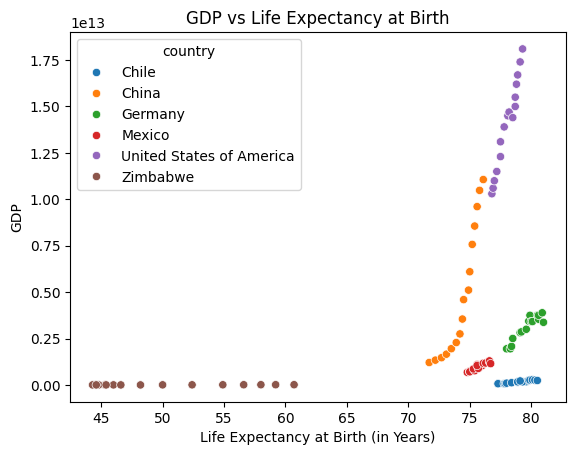

<Figure size 640x480 with 0 Axes>

In [137]:
sns.scatterplot(x=data.life_expectancy, y=data.gdp, hue=data.country)
plt.title('GDP vs Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth (in Years)')
plt.ylabel('GDP')
plt.savefig('./resources/gdp_v_life_exp_scatter.png', bbox_inches='tight')
plt.show()
plt.clf()

### Distribution Plots
Next, histograms of both GDP and Life Expectancy are plotted in an attempt to answer the following questions:
- <em>What is the distribution of Life Expectancy?</em>
- <em>What is the distribution of GDP among the six countries?</em>

As demonstrated by the plots below, the distribution of Life Expectancy is skewed left, with an average of 72.8 years, while the distribution of GDP is skewed right, with an average of approximately $3.9 Trillion.

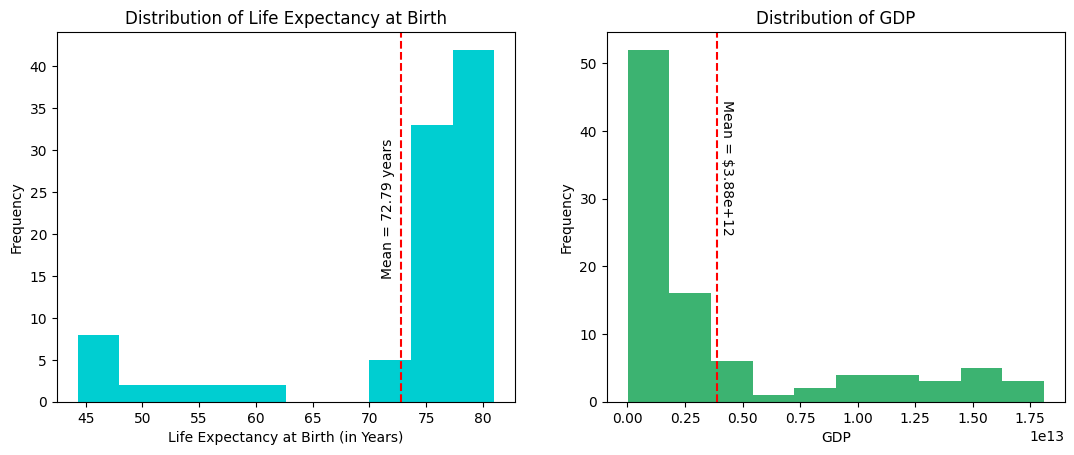

<Figure size 640x480 with 0 Axes>

In [138]:
avg_life_exp = data.life_expectancy.mean()

plt.subplot(1, 2, 1)
plt.hist(data.life_expectancy, color='darkturquoise')
plt.axvline(data.life_expectancy.mean(), c='r',
            linestyle='--')
plt.text(71, 15, f'Mean = {round(avg_life_exp*100)/100} years',
         rotation='vertical')
plt.xlabel('Life Expectancy at Birth (in Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy at Birth')

plt.subplot(1, 2, 2)
plt.hist(data.gdp, color='mediumseagreen')
plt.axvline(data.gdp.mean(), c='r',
            linestyle='--')
plt.text(0.4e+13, 25, 'Mean = $3.88e+12', rotation=270)
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.title('Distribution of GDP')

plt.subplots_adjust(wspace=0.2, right=1.7)

plt.savefig('./resources/gdp_life_exp_distr.jpg', bbox_inches='tight')
plt.show()
plt.clf()

### Life Expectancy Distribution Plots per Country
Subsequently, histograms for the Life Expectancy of each country were plotted for the purpose of visualizing each country's Life Expectancy distributions. Furthermore, these distribution plots answer the following question:

- <em>What is the average life expectancy in these nations?</em>

As one can see,  many of these distributions are relatively normal with a few outliers. However, a few of these plots appear to be rather skewed towards one direction or the other, implying a wider range of life expectancies over the course of 15 years.

In [139]:
# Separating the data for each country into their own separate
# databases. Makes it easier to generate the following plots, 
# since each plot represents one country.
data_by_country = {}
list_of_countries = ['Zimbabwe', 'United States of America', 'Mexico',
                     'Germany', 'China', 'Chile']
for country in list_of_countries:
    data_by_country[country] = [data[data.country == country]]
    match country:
        case 'Zimbabwe':
            data_by_country[country].append('brown')
        case 'United States of America':
            data_by_country[country].append('purple')
        case 'Mexico':
            data_by_country[country].append('turquoise')
        case 'Germany':
            data_by_country[country].append('green')
        case 'China':
            data_by_country[country].append('darkorange')
        case 'Chile':
            data_by_country[country].append('blue')

In [140]:
# Function used to format the text and location
# to output the average and label it on the 
# individual graphs.
def get_txt_params(country, stat, stat_avg):
  txt_x = 0
  txt_y = 4
  rotation = 90
  stat_avg_str = ''
  if (stat == 'gdp'):
    match country:
      case 'Zimbabwe':
        txt_x = stat_avg + 0.025e+10
        txt_y = 3
        stat_avg = stat_avg / 1e+10
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = '$' + str(stat_avg) + 'e+10'
        rotation = 270
      case 'United States of America':
        txt_x = stat_avg - 0.063e+13
        txt_y = 1.5
        stat_avg = stat_avg / 1e+13
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = '$' + str(stat_avg) + 'e+13'
      case 'Mexico':
        txt_x = stat_avg - 0.05e+12
        txt_y = 2
        stat_avg = stat_avg / 1e+12
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = '$' + str(stat_avg) + 'e+12'
      case 'Germany':
        txt_x = stat_avg + 0.025e+12
        txt_y = 2.0
        stat_avg = stat_avg / 1e+12
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = '$' + str(stat_avg) + 'e+12'
        rotation = 270
      case 'China':
        txt_x = stat_avg + 0.02e+13
        txt_y = 2.65
        stat_avg = stat_avg / 1e+13
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = '$' + str(stat_avg) + 'e+13'
        rotation = 270
      case 'Chile':
        txt_x = stat_avg + 0.05e+11
        txt_y = 2.125
        stat_avg = stat_avg / 1e+11
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = '$' + str(stat_avg) + 'e+11'
        rotation = 270
  elif (stat == 'life expectancy'):
    match country:
      case 'Zimbabwe':
        txt_x = stat_avg + 0.25
        txt_y = 3
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = str(stat_avg) + ' years'
        rotation = 270
      case 'United States of America':
        txt_x = stat_avg - 0.2
        txt_y = 1.5
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = str(stat_avg) + ' years'
      case 'Mexico':
        txt_x = stat_avg + 0.05
        txt_y = 1.5
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = str(stat_avg) + ' years'
        rotation = 270
      case 'Germany':
        txt_x = stat_avg - 0.25
        txt_y = 1.6
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = str(stat_avg) + ' years'
      case 'China':
        txt_x = stat_avg - 0.3
        txt_y = 1.5
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = str(stat_avg) + ' years'
        #rotation = 270
      case 'Chile':
        txt_x = stat_avg - 0.3
        txt_y = 1.5
        stat_avg = round(stat_avg * 100) / 100
        stat_avg_str = str(stat_avg) + ' years'
        
  return txt_x, txt_y, stat_avg_str, rotation

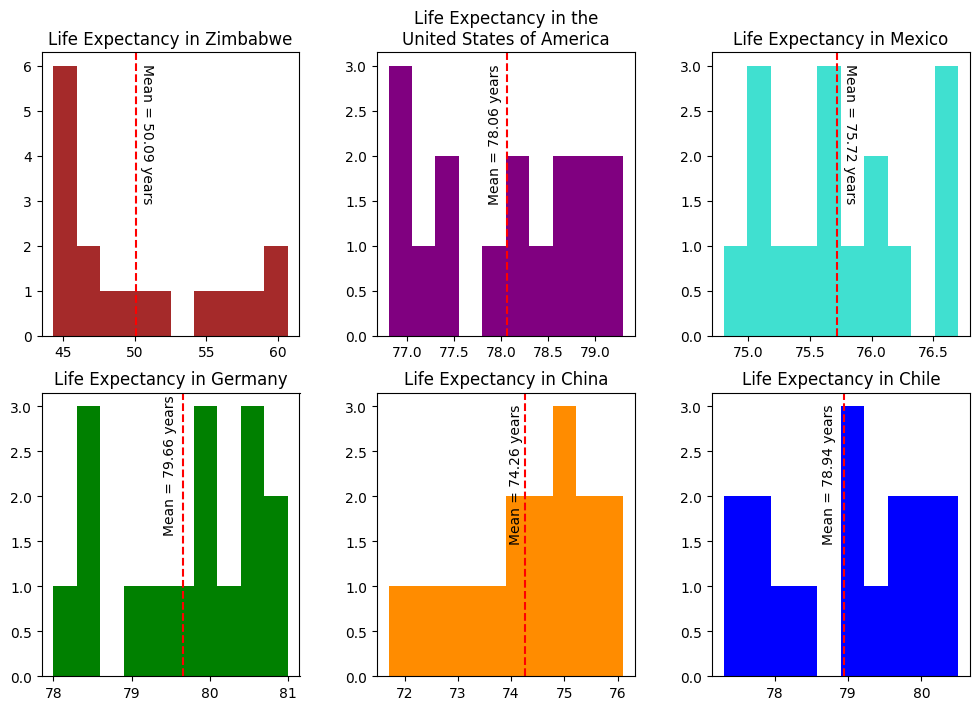

<Figure size 640x480 with 0 Axes>

In [141]:
index = 1
for country in list_of_countries:
    plt.subplot(2, 3, index)
    plt.hist(data_by_country[country][0].life_expectancy, color=data_by_country[country][1])
    if (country != 'United States of America'):
        plt.title('Life Expectancy in {}'.format(country))
    else:
        plt.title('Life Expectancy in the\nUnited States of America')
    avg_le = np.mean(data_by_country[country][0].life_expectancy)
    plt.axvline(avg_le, color='r', linestyle='--')
    txt_x, txt_y, avg_le_str, rotation = get_txt_params(country, 'life expectancy', avg_le)
    plt.text(txt_x, txt_y, f'Mean = {avg_le_str}', rotation=rotation)
    index += 1

plt.subplots_adjust(wspace=0.3, left=0.3, right=1.75, top=1.4, bottom=0.1)
plt.savefig('./resources/life_exp_by_country.jpg', bbox_inches='tight')
plt.show()
plt.clf()

### GDP Distribution Plots per Country
Likewise, histograms for the GDP of each country were also plotted for the purpose of visualizing each country's GDP distributions over the 15 year time period from 2000-2015. These distribution plots aim to answer the following question:

- <em>What is the average GDP in these nations?</em>

As one can see, these distributions closely resemble the opposite of the life expectancy distributions, with many being rather skewed and only a few being relatively normal.

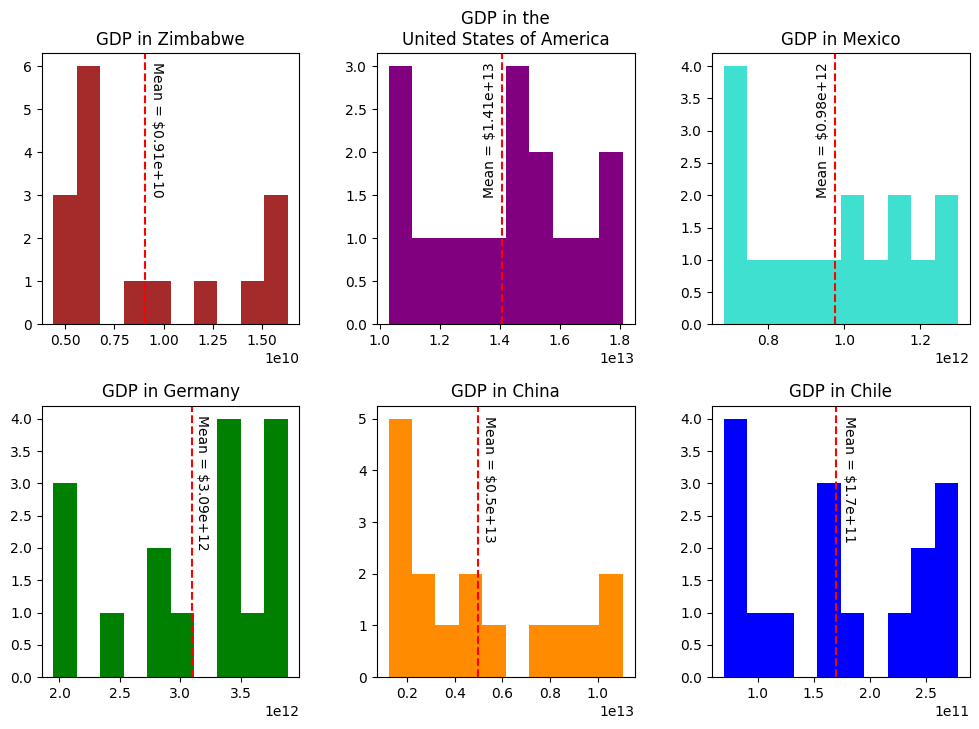

<Figure size 640x480 with 0 Axes>

In [142]:
index = 1
for country in list_of_countries:
    plt.subplot(2, 3, index)
    plt.hist(data_by_country[country][0].gdp, color=data_by_country[country][1])
    if (country != 'United States of America'):
        plt.title('GDP in {}'.format(country))
    else:
        plt.title('GDP in the\nUnited States of America')
    avg_gdp = np.mean(data_by_country[country][0].gdp)
    plt.axvline(avg_gdp, color='r', linestyle='--')
    txt_x, txt_y, avg_gdp_str, rotation = get_txt_params(country, 'gdp', avg_gdp)
    plt.text(txt_x, txt_y, f'Mean = {avg_gdp_str}', rotation=rotation)
    index += 1

plt.subplots_adjust(wspace=0.3, hspace=0.3, left=0.3, right=1.75, top=1.4, bottom=0.1)
plt.savefig('./resources/gdp_by_country.jpg', bbox_inches='tight')
plt.show()
plt.clf()

### Scatter Plots per Country
Once the histograms have been plotted and the distributions analyzed for each country, the next step is to plot a scatter plot to picture the relationship between the GDP and life expectancy for each country and to begin an attempt at answering the following question:

- <em>Is there a correlation between GDP and life expectancy of a country?</em>

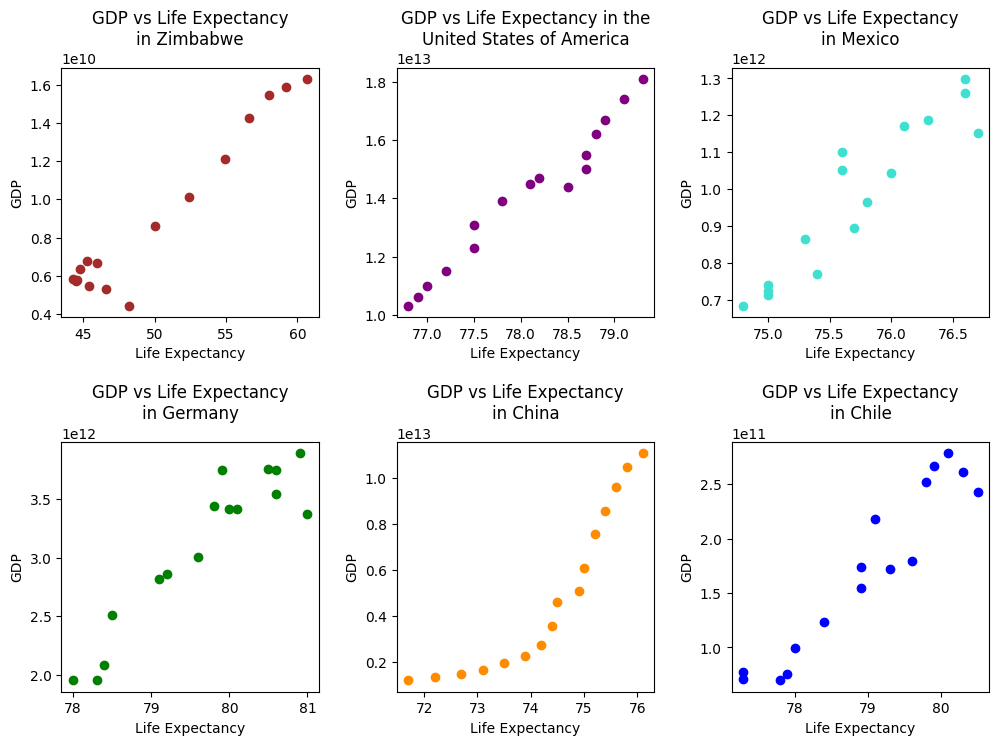

<Figure size 640x480 with 0 Axes>

In [154]:
index = 1
for country in list_of_countries:
    plt.subplot(2, 3, index)
    plt.scatter(x=data_by_country[country][0].life_expectancy, y=data_by_country[country][0].gdp,
               color=data_by_country[country][1])
    if (country != 'United States of America'):
        plt.title('GDP vs Life Expectancy\nin {}'.format(country))
    else:
        plt.title('GDP vs Life Expectancy in the\nUnited States of America')
    plt.xlabel('Life Expectancy')
    plt.ylabel('GDP')
    index += 1

plt.subplots_adjust(wspace=0.3, hspace=0.5, left=0.3, right=1.75, top=1.4, bottom=0.1)
plt.savefig('./resources/gdp_v_life_exp_by_country.jpg', bbox_inches='tight')
plt.show()
plt.clf()

As can be observed from the plots shown above, the GDP of each country shares a strong positive correlation with their respective country's life expectancy. This means that as GDP of a particular country increases, it appears that the average life expectancy for that country also increases. However, there is still a bit left to do in order to confirm this hypothesis, starting with plotting a best-fit line over each plot to better picture how well a linear relationship can match the trends shown. 

### Normality and Homoscedasticity Tests per Country
Before linear regression can be conducted on this data, however, normality and homoscedasticity tests must be completed. The normality and homoscedasticity tests can be described as follows:

The normality test checks to see if the normality assumption is met, which states that the residuals of any independent dataset will approach a normal distribution when the dataset is large enough. If this assumption is not met then it means one of two things: either the dataset isn't big enough or the data depends on some third, unknown variable - both of which can lead to biased results.

The homoscedasticity test checks to see if the homoscedasticity assumption is met, which states that the residuals should have equal variation across all values of the predictor, or independent, variable. If this assumption is not met then it means that there is a changing variation in the size of the error term across the independent variable. This can lead to biased results, as linear regression seeks to minimize residuals and gives all observations an equal amount of weight.

In [144]:
for country in list_of_countries:
    data_dict = {}
    data_dict['model'] = sm.OLS.from_formula('gdp ~ life_expectancy', data_by_country[country][0])
    data_dict['results'] = data_dict['model'].fit()
    data_dict['fitted_vals'] = data_dict['results'].predict(data_by_country[country][0])
    data_dict['residuals'] = data_by_country[country][0].gdp - data_dict['fitted_vals']
    data_by_country[country].append(data_dict)

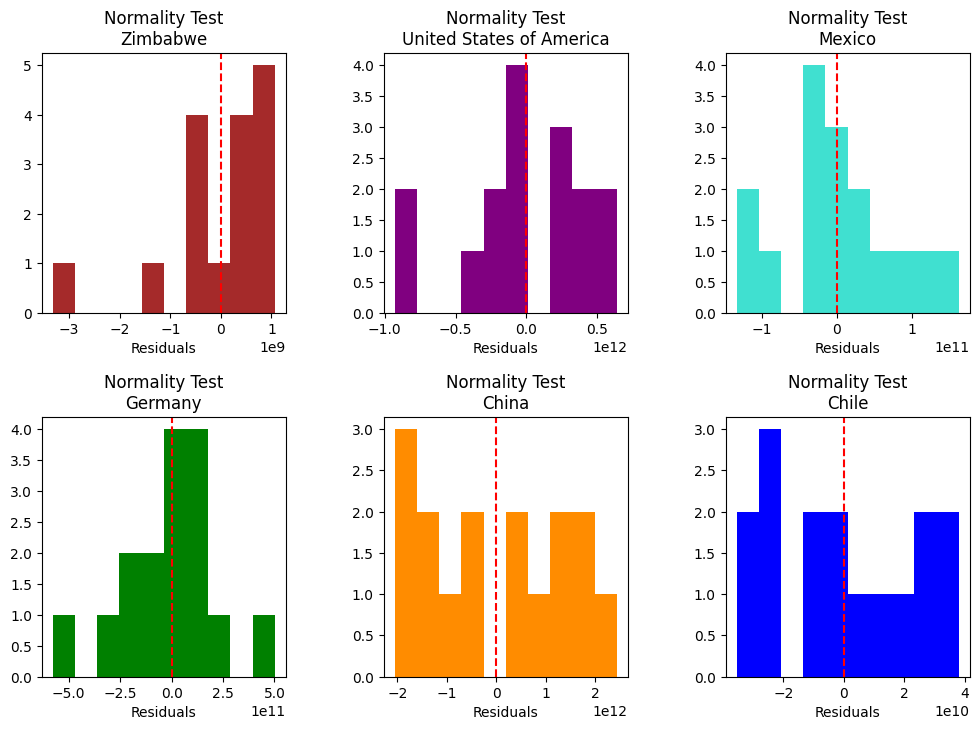

<Figure size 640x480 with 0 Axes>

In [145]:
index = 1
for country in list_of_countries:
    plt.subplot(2, 3, index)
    residuals = data_by_country[country][2]['residuals']
    plt.hist(residuals, color=data_by_country[country][1], bins=10)
    plt.axvline(np.mean(residuals), color='r', linestyle='--')
    if (country != 'United States of America'):
        plt.title('Normality Test\n{}'.format(country))
    else:
        plt.title('Normality Test\nUnited States of America')
    plt.xlabel('Residuals')
    index += 1

plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.3, right=1.75, top=1.4, bottom=0.1)
plt.savefig('./resources/normality_test.jpg', bbox_inches='tight')
plt.show()
plt.clf()

By looking at the graphs above, one can see that most of these plots indicate a normal distribution, but the plot for Zimbabwe appears to be slightly skewed to the left. However, although Zimbabwe appears to be slightly skewed, one can tell that the bulk of the data for this country centers at the graph's origin while only a couple data points are lying far to the left of that point. This seems to hint at the fact that the data suffers from a couple of outliers rather than being "skewed". Therefore, it appears that each plot passes the Normality test, meaning there is sufficient enough data to conduct linear regression on them. Now it's time to check the homoscedasticity assumption.

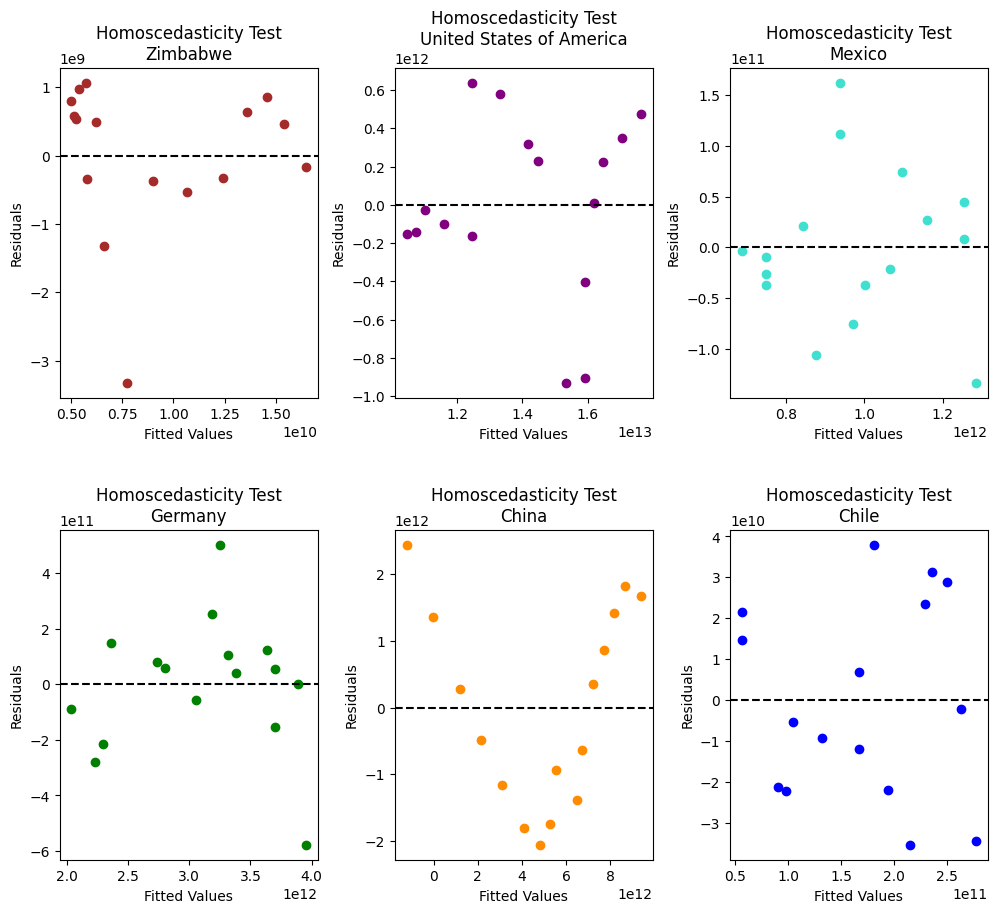

<Figure size 640x480 with 0 Axes>

In [146]:
index = 1
for country in list_of_countries:
    plt.subplot(2, 3, index)
    residuals = data_by_country[country][2]['residuals']
    fitted_vals = data_by_country[country][2]['fitted_vals']
    plt.scatter(fitted_vals, residuals, color=data_by_country[country][1])
    plt.axhline(0, color='black', linestyle='--')
    if (country != 'United States of America'):
        plt.title('Homoscedasticity Test\n{}'.format(country))
    else:
        plt.title('Homoscedasticity Test\nUnited States of America')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    index += 1

plt.subplots_adjust(wspace=0.3, hspace=0.4, left=0.3, right=1.75, top=1.75, bottom=0.1)
plt.savefig('./resources/homoscedasticity.jpg', bbox_inches='tight')
plt.show()
plt.clf()

Based on the plots above, the plot points for each distribution are centered around y=0, meaning that the data for each country meets the homoscedasticity assumption. Thus, each plot has passed both the normality and homoscedasticity tests and it is safe to conduct linear regression.

### Correlation Coefficient per Country

Lastly, the correlation coefficient is found for each country to ensure that each plot portrays a strong linear relationship and linear regression will produce meaningful results. 

In [147]:
pearson_corr = {'Country': list_of_countries,
                'Correlation Coefficient': []}
for country in pearson_corr['Country']:
    corr_coeff, pval = stats.pearsonr(data_by_country[country][0].life_expectancy,
                                      data_by_country[country][0].gdp)
    pearson_corr['Correlation Coefficient'].append(corr_coeff)

pearson_corr = pd.DataFrame.from_dict(pearson_corr).set_index('Country')
print(pearson_corr)

                          Correlation Coefficient
Country                                          
Zimbabwe                                 0.966200
United States of America                 0.981709
Mexico                                   0.932238
Germany                                  0.932699
China                                    0.908526
Chile                                    0.949877


And, just as predicted, each plot has a correlation coefficient close to 1.0, meaning each portrays a strong linear relationship and linear regression will produce valuable results. More than that, however, this seems to show that there is a strong positive linear relationship between the GDP and life expectancy of each country. To visually demonstrate this, a best-fit line will be produced using linear regression, and plotted over each set of data points.

### Best-Fit Line per Country

To portray the positive linear relationship between the GDP and life expectancy of each country, linear regression is conducted to generate a best-fit line, which is then fitted over it's respective plot. This can be seen below.

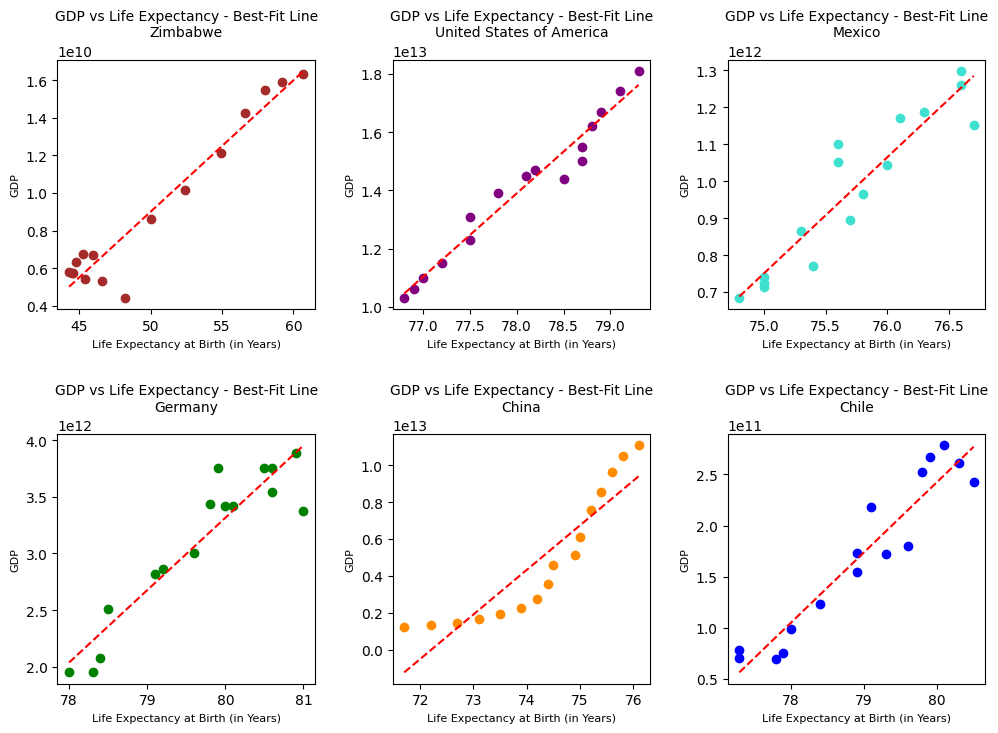

<Figure size 640x480 with 0 Axes>

In [148]:
index = 1
for country in list_of_countries:
    slope = data_by_country[country][2]['results'].params.iloc[1]
    intercept = data_by_country[country][2]['results'].params.iloc[0]
    fitted_xval = [min(data_by_country[country][0].life_expectancy),
                   max(data_by_country[country][0].life_expectancy)]
    fitted_yval = [(x*slope)+intercept for x in fitted_xval]

    plt.subplot(2, 3, index)
    plt.scatter(data_by_country[country][0].life_expectancy,
                data_by_country[country][0].gdp,
                color=data_by_country[country][1])
    plt.plot(fitted_xval, fitted_yval, color='r', linestyle='--')
    if (country != 'United States of America'):
        plt.title('GDP vs Life Expectancy - Best-Fit Line\n{}'.format(country),
                 fontsize=10)
    else:
        plt.title('GDP vs Life Expectancy - Best-Fit Line\nUnited States of America',
                 fontsize=10)
    plt.xlabel('Life Expectancy at Birth (in Years)', fontsize=8)
    plt.ylabel('GDP', fontsize=8)
    index += 1

plt.subplots_adjust(wspace=0.3, hspace=0.5, left=0.3, right=1.75, top=1.4, bottom=0.1)
plt.savefig('./resources/best_fit_line.jpg', bbox_inches='tight')
plt.show()
plt.clf()

As can be seen from the plots above, each country has a strong linear relationship between it's respective GDP and life expectancy. This means that the life expectancy of each country increases as that country's GDP increases, and so the two are shown to be strongly correlated.

### Average GDP and Life Expectancy per Country

Earlier, we were attempting to draw conclusions from the 'GDP vs Life Expectancy at Birth' scatter plot and answer the following question:

- If one country has a higher GDP than another country, is that country also likely to have a longer life expectancy?

But were unable to due to the plot being overcrowded. Thus, a side-by-side bar graph of each of the countries' average GDP and life expectancy is produced below to try and get a better grasp on this information and draw useful conclusions. 

In [149]:
def create_xvals_list(n, t, d, w):
    return [t*element + w*n for element in range(d)]

def gen_bargraph(sort_by):
    xvals_gdp = create_xvals_list(1, 2, 6, 0.8)
    xvals_life_exp = create_xvals_list(2, 2, 6, 0.8)
    xticks = [(xvals_gdp[i] + xvals_life_exp[i])/2 for i in range(len(xvals_gdp))]
    life_exp_data = data.groupby('country').life_expectancy.mean().reset_index()
    gdp_data = data.groupby('country').gdp.mean().reset_index()
    
    
    if (sort_by.lower() == 'gdp'):
        gdp_data_sorted = gdp_data.sort_values('gdp')
        life_exp_data_sorted_gdp = data.groupby('country').life_expectancy.mean()
        life_exp_data_t = life_exp_data_sorted_gdp.reset_index().set_index('country').T
        le_cols_list = life_exp_data_t.columns.to_list()
        index_list_le = [5, 0, 3, 2, 1, 4]
        le_cols_list_r = []
        for i in index_list_le:
            le_cols_list_r.append(le_cols_list[i])
        life_exp_data_t = life_exp_data_t[le_cols_list_r]
        life_exp_data_sorted_gdp = life_exp_data_t.T.reset_index()
        xlabels_sorted_gdp = ['Zimbabwe', 'Chile', 'Mexico', 'Germany', 'China', 'USA']
    elif (sort_by.lower() == 'life expectancy'):
        life_exp_data_sorted = life_exp_data.sort_values('life_expectancy')
        gdp_data_sorted_le = gdp_data.set_index('country').T
        gdp_cols_list = gdp_data_sorted_le.columns.to_list()
        index_list_gdp = [5, 1, 3, 4, 0, 2]
        gdp_cols_list_r = []
        for i in index_list_gdp:
            gdp_cols_list_r.append(gdp_cols_list[i])
        gdp_data_sorted_le = gdp_data_sorted_le[gdp_cols_list_r].T.reset_index()
        xlabels_sorted_le = ['Zimbabwe', 'China', 'Mexico', 'USA', 'Chile', 'Germany']
    else:
        print('invalid input\nPlease Enter either \'GDP\' or \'Life Expectancy\'')
    
    if ((sort_by.lower() == 'gdp') or (sort_by.lower() == 'life expectancy')):
        fig, ax = plt.subplots()
        ax.set_xticks(xticks)
        ax.set_xlabel('Country')
        ax.set_ylabel('GDP')
        ax.yaxis.labelpad = 15
        ax.xaxis.labelpad = 10
    
        ax2 = ax.twinx()
        ax2.set_ylim([40, 82])
        ax2.set_ylabel('Life Expectancy at Birth (in Years)')
        ax2.yaxis.labelpad = 15
    
        if (sort_by.lower() == 'gdp'):
            bar1 = ax.bar(xvals_gdp, gdp_data_sorted.gdp, color='firebrick', label='GDP')
            ax.set_xticklabels(xlabels_sorted_gdp)
            bar2 = ax2.bar(xvals_life_exp, life_exp_data_sorted_gdp.life_expectancy, color='aqua',
                           label='Life Expectancy')
            plt.title(f'GDP and Life Expectancy Per Country\nSorted By {sort_by.upper()}')
        else:
            bar1 = ax.bar(xvals_gdp, gdp_data_sorted_le.gdp, color='firebrick', label='GDP')
            ax.set_xticklabels(xlabels_sorted_le)
            bar2 = ax2.bar(xvals_life_exp, life_exp_data_sorted.life_expectancy, color='aqua',
                           label='Life Expectancy')
            plt.title(f'GDP and Life Expectancy Per Country\nSorted By {sort_by.title()}')
        
        bars, labels = ax.get_legend_handles_labels()
        bars2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(bars + bars2, labels + labels2, loc=2)

        plt.savefig('./resources/gdp_life_exp_bar.png', bbox_inches='tight')
        plt.show()
        plt.clf()

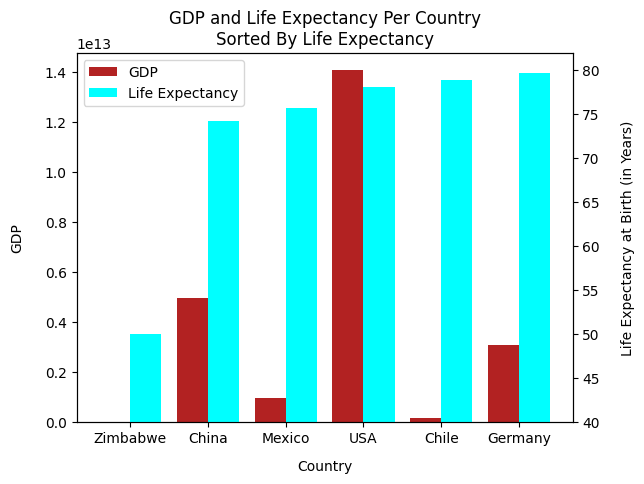

<Figure size 640x480 with 0 Axes>

In [150]:
gen_bargraph('life expectancy')

This plot illustrates quite a dissocation between the GDP and life expectancy between countries, as the countries with the highest life expectancy are not necessarily the same countries that have the highest GDP and vice versa. This, in turn, means that just because a country has a higher life expectancy than another country doesn't mean that that country has a higher GDP.

### Yearly GDP  by Country - Heatmap

Finally, heatmaps of each country's GDP and life expectancy were generated in an  attempt to answer the following questions:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?

These heatmaps can be seen below.

In [151]:
gdp_data_by_country = data.groupby(['country', 'year']).gdp.mean().reset_index()
gdp_data_filtered_u = gdp_data_by_country[gdp_data_by_country.country.apply(lambda x: x not in ["Chile", "Mexico", "Zimbabwe"])]
gdp_data_filtered_u = gdp_data_filtered_u.pivot(index='year', columns='country', values='gdp').T
gdp_data_filtered_l = gdp_data_by_country[gdp_data_by_country.country.apply(lambda x: x in ["Chile", "Mexico", "Zimbabwe"])]
gdp_data_filtered_l = gdp_data_filtered_l.pivot(index='year', columns='country', values='gdp').T

life_exp_data_by_country = data.groupby(['country', 'year']).life_expectancy.mean().reset_index()
life_exp_data_filtered_u = life_exp_data_by_country[life_exp_data_by_country.country.apply(lambda x: x not in ["China", "Mexico", "Zimbabwe"])]
life_exp_data_filtered_u = life_exp_data_filtered_u.pivot(index='year', columns='country', values='life_expectancy').T
life_exp_data_filtered_l = life_exp_data_by_country[life_exp_data_by_country.country.apply(lambda x: x in ["China", "Mexico", "Zimbabwe"])]
life_exp_data_filtered_l = life_exp_data_filtered_l.pivot(index='year', columns='country', values='life_expectancy').T

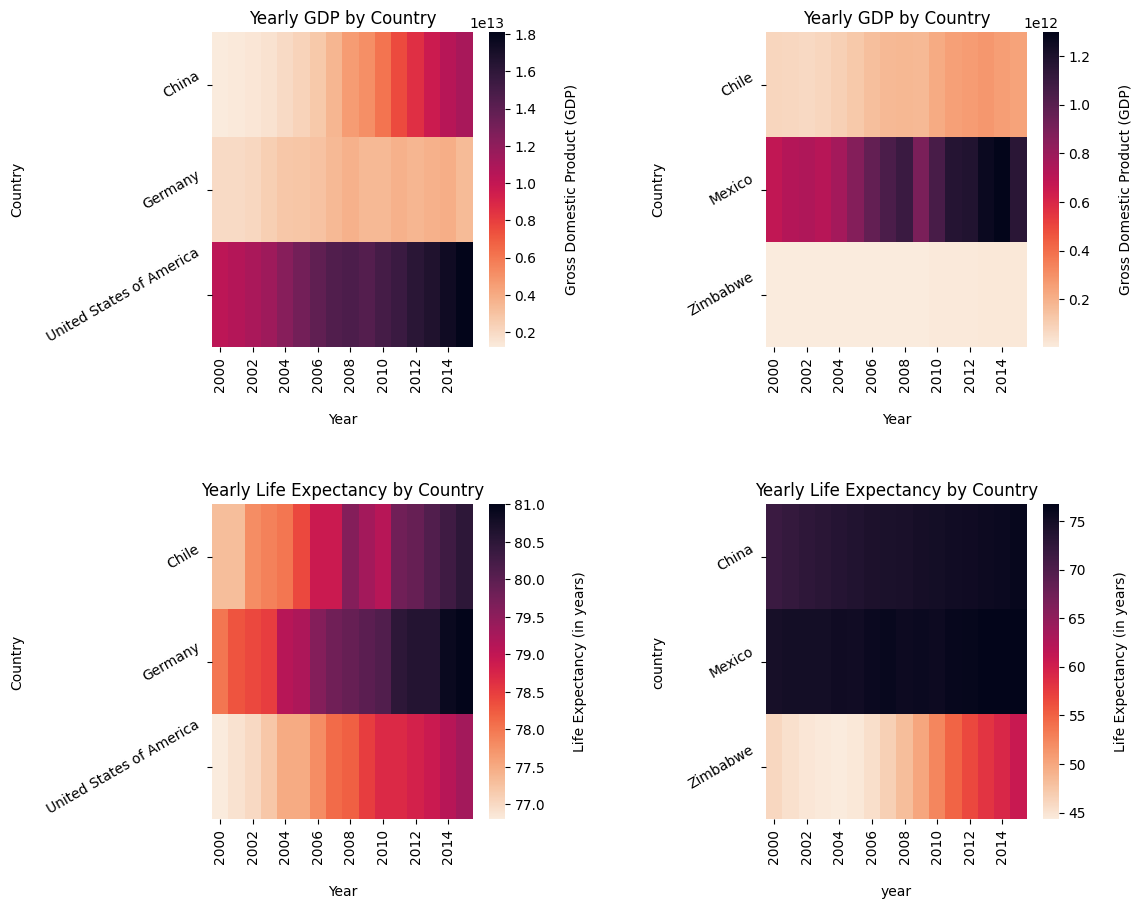

<Figure size 640x480 with 0 Axes>

In [152]:
ax = plt.subplot(2, 2, 1)
hm = sns.heatmap(gdp_data_filtered_u, cmap=sns.cm.rocket_r)
cbar = hm.collections[0].colorbar
cbar.set_label('Gross Domestic Product (GDP)', labelpad=20)
plt.title('Yearly GDP by Country')
plt.xlabel('Year')
plt.ylabel('Country')
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
plt.yticks(rotation=30)

ax2 = plt.subplot(2, 2, 2)
hm = sns.heatmap(gdp_data_filtered_l, cmap=sns.cm.rocket_r)
cbar = hm.collections[0].colorbar
cbar.set_label('Gross Domestic Product (GDP)', labelpad=20)
plt.title('Yearly GDP by Country')
plt.xlabel('Year')
plt.ylabel('Country')
ax2.xaxis.labelpad = 15
ax2.yaxis.labelpad = 15
plt.yticks(rotation=30)

ax3 = plt.subplot(2, 2, 3)
hm = sns.heatmap(life_exp_data_filtered_u, cmap=sns.cm.rocket_r)
cbar = hm.collections[0].colorbar
cbar.set_label('Life Expectancy (in years)', labelpad=20)
plt.title('Yearly Life Expectancy by Country')
plt.xlabel('Year')
plt.ylabel('Country')
ax3.xaxis.labelpad = 15
ax3.yaxis.labelpad = 15
plt.yticks(rotation=30)

ax4 = plt.subplot(2, 2, 4)
hm = sns.heatmap(life_exp_data_filtered_l, cmap=sns.cm.rocket_r)
cbar = hm.collections[0].colorbar
cbar.set_label('Life Expectancy (in years)', labelpad=20)
plt.title('Yearly Life Expectancy by Country')
ax4.xaxis.labelpad = 15
ax4.yaxis.labelpad = 15
plt.yticks(rotation=30)

plt.subplots_adjust(right=1.5, top=1.75, wspace=0.7, hspace=0.5)

plt.savefig('./resources/heatmaps.jpg', bbox_inches='tight')
plt.show()
plt.clf()

As one can see, there are, unfortunately, a few of these heatmaps that are hard to make sense of, as they don't seem to show any transition in color. This is mainly because of the imbalance between some of these countries, such as Zimbabwe having a much lower GDP and life expectancy than the other countries. However, although a few may be hard to read, most show a clear positive trend of an increasing GDP and life expectancy over the years. Thus, one can come to the conclusion that the answer to this question is a resounding yes, the GDP and life expectancy of these various countries has increased over time.

## Conclusion

The analysis aimed to investigate the relationship between GDP and life expectancy across six nations over a 15-year period. Through data visualization and statistical analysis, several key findings emerged.

Firstly, scatter plots revealed a general positive trend between GDP and life expectancy, suggesting that as GDP increases, so does life expectancy. However, the correlation between GDP and life expectancy varied among countries.

Distribution plots illustrated the diversity in life expectancy and GDP distributions across the six nations. While some countries exhibited relatively normal distributions, others showed skewed distributions, indicating a wide range of life expectancies and GDP levels.

Linear regression analysis confirmed a strong positive linear relationship between GDP and life expectancy for each country. The correlation coefficients approached 1.0, indicating a significant association between the two variables.

Furthermore, a comparison of average GDP and life expectancy across countries revealed a dissociation, as countries with higher life expectancies did not necessarily have higher GDPs, and vice versa.

Heatmaps displayed an overall increasing trend in GDP and life expectancy over time across the six nations. Despite some challenges in interpretation due to imbalances between countries, the majority of the heatmaps indicated positive transitions over the years.

In conclusion, the analysis suggests that while GDP positively influences life expectancy, the relationship is nuanced and varies among nations. The findings highlight the importance of considering multiple factors beyond GDP alone in understanding life expectancy trends. Overall, the study contributes valuable insights into the complex interplay between economic development and public health outcomes.